<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [6]</a>'.</span>

# SciTeX Gen Module - Core Generation Utilities

This comprehensive notebook demonstrates the SciTeX gen module capabilities, covering core generation utilities and helper functions.

## Features Covered

### Core Utilities
* Data normalization and transformation
* Array dimension handling
* Type checking and validation
* Shell command execution

### Development Tools
* Configuration printing
* Module inspection
* Environment checking
* Caching mechanisms

### File Operations
* Symlink management
* Text processing
* XML/JSON conversion
* Path utilities

In [1]:
import sys
sys.path.insert(0, '../src')
import scitex
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import tempfile
import os

# Set up example data directory
data_dir = Path("./gen_examples")
data_dir.mkdir(exist_ok=True)

print("SciTeX Gen Module Tutorial - Ready to begin!")
print(f"Available gen functions: {len(scitex.gen.__all__)}")

SciTeX Gen Module Tutorial - Ready to begin!
Available gen functions: 63


## Part 1: Data Normalization and Transformation

### 1.1 Normalization Functions

In [2]:
# Create sample data for normalization
sample_data = np.random.randn(1000) * 10 + 50  # Mean=50, std=10
sample_2d = np.random.randn(100, 20) * 5 + 25   # 2D array

print(f"Original data stats:")
print(f"  Mean: {np.mean(sample_data):.2f}")
print(f"  Std: {np.std(sample_data):.2f}")
print(f"  Min: {np.min(sample_data):.2f}")
print(f"  Max: {np.max(sample_data):.2f}")

# Normalize to 0-1 range
normalized_01 = scitex.gen.to_01(sample_data)
print(f"\nNormalized to [0,1]:")
print(f"  Min: {np.min(normalized_01):.2f}")
print(f"  Max: {np.max(normalized_01):.2f}")

# Z-score normalization
z_normalized = scitex.gen.to_z(sample_data)
print(f"\nZ-score normalized:")
print(f"  Mean: {np.mean(z_normalized):.2f}")
print(f"  Std: {np.std(z_normalized):.2f}")

# Remove bias (center at zero)
unbiased = scitex.gen.unbias(sample_data)
print(f"\nUnbiased (centered):")
print(f"  Mean: {np.mean(unbiased):.2f}")
print(f"  Original mean: {np.mean(sample_data):.2f}")

Original data stats:
  Mean: 50.19
  Std: 9.79
  Min: 17.59
  Max: 88.53

Normalized to [0,1]:
  Min: 0.00
  Max: 1.00

Z-score normalized:
  Mean: -0.00
  Std: 1.00

Unbiased (centered):
  Mean: -0.00
  Original mean: 50.19


Data with outliers:
  Min: -50.00
  Max: 200.00

Clipped to 5th-95th percentiles:
  Min: 34.52
  Max: 66.95


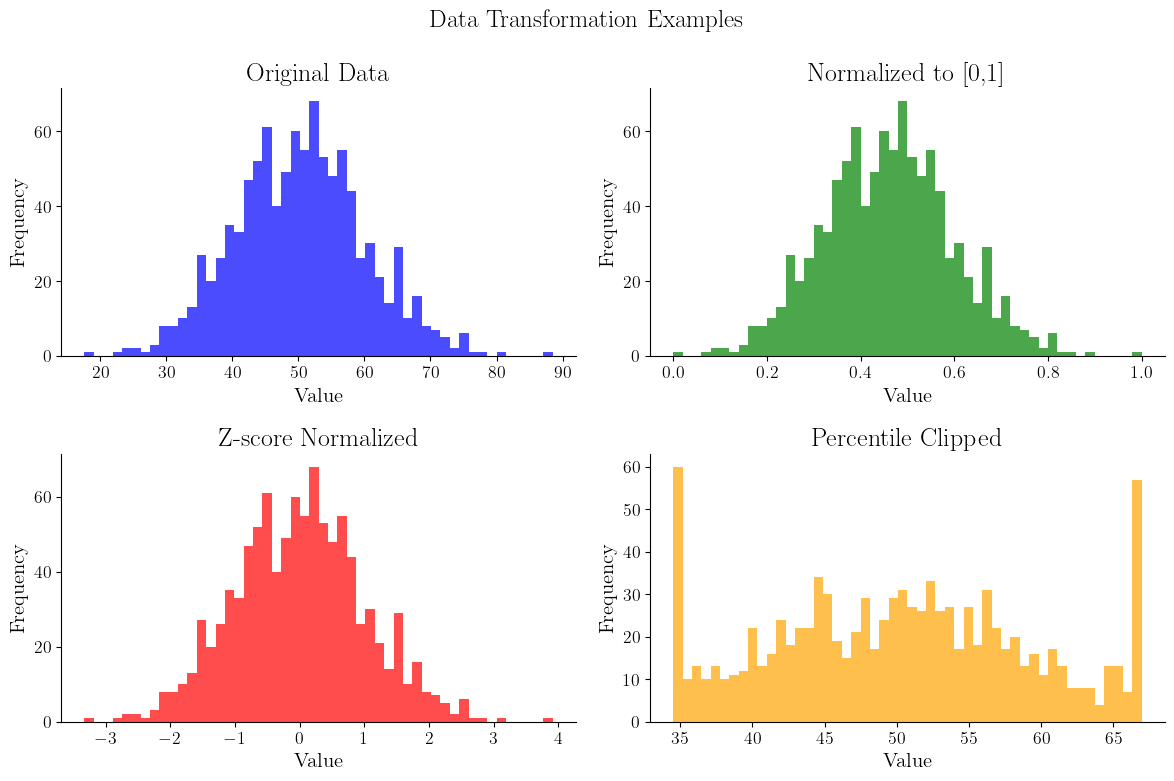

In [3]:
# Percentile-based clipping
outlier_data = np.concatenate([sample_data, [200, -50, 150, -30]])  # Add outliers
print(f"Data with outliers:")
print(f"  Min: {np.min(outlier_data):.2f}")
print(f"  Max: {np.max(outlier_data):.2f}")

# Clip to 5th and 95th percentiles
clipped = scitex.gen.clip_perc(outlier_data, low=5, high=95)
print(f"\nClipped to 5th-95th percentiles:")
print(f"  Min: {np.min(clipped):.2f}")
print(f"  Max: {np.max(clipped):.2f}")

# Visualize transformations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Data Transformation Examples')

axes[0, 0].hist(sample_data, bins=50, alpha=0.7, color='blue')
axes[0, 0].set_title('Original Data')
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(normalized_01, bins=50, alpha=0.7, color='green')
axes[0, 1].set_title('Normalized to [0,1]')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(z_normalized, bins=50, alpha=0.7, color='red')
axes[1, 0].set_title('Z-score Normalized')
axes[1, 0].set_xlabel('Value')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(clipped, bins=50, alpha=0.7, color='orange')
axes[1, 1].set_title('Percentile Clipped')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### 1.2 Ranking and Ordering Functions

Test values: [85 92 78 95 88 91 73 96 82 89]
Ranks: [ 4.  8.  2.  9.  5.  7.  1. 10.  3.  6.]

Ranked data:
   Value  Rank
6     73   1.0
2     78   2.0
8     82   3.0
0     85   4.0
4     88   5.0
9     89   6.0
5     91   7.0
1     92   8.0
3     95   9.0
7     96  10.0

Even/Odd Conversion Examples:
  1 -> even: 0, odd: 1
  2 -> even: 2, odd: 1
  3 -> even: 2, odd: 3
  4 -> even: 4, odd: 3
  5 -> even: 4, odd: 5
  6 -> even: 6, odd: 5
  7 -> even: 6, odd: 7
  8 -> even: 8, odd: 7
  9 -> even: 8, odd: 9
  10 -> even: 10, odd: 9

Original numbers: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
To even: [ 0  2  2  4  4  6  6  8  8 10 10 12 12 14 14 16 16 18 18 20]
To odd: [ 1  1  3  3  5  5  7  7  9  9 11 11 13 13 15 15 17 17 19 19]


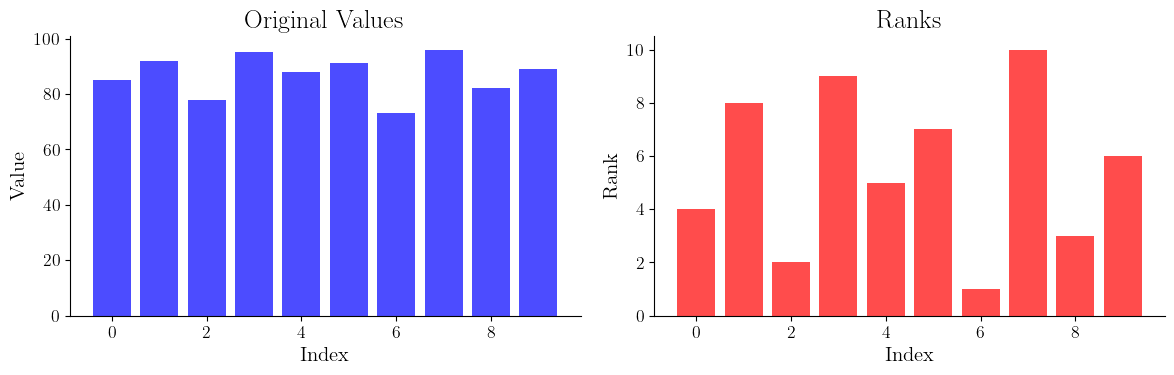

In [4]:
# Create test data for ranking
test_values = np.array([85, 92, 78, 95, 88, 91, 73, 96, 82, 89])
print(f"Test values: {test_values}")

# Convert to ranks
ranks = scitex.gen.to_rank(test_values)
print(f"Ranks: {ranks}")

# Show correspondence
ranked_data = pd.DataFrame({
    'Value': test_values,
    'Rank': ranks
})
ranked_data = ranked_data.sort_values('Rank')
print(f"\nRanked data:")
print(ranked_data)

# Even/odd utilities - demonstrate with individual numbers
print(f"\nEven/Odd Conversion Examples:")
test_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for num in test_numbers:
    even = scitex.gen.to_even(num)
    odd = scitex.gen.to_odd(num)
    print(f"  {num} -> even: {even}, odd: {odd}")

# If you need to apply to arrays, use list comprehension or numpy.vectorize
numbers = np.arange(1, 21)
even_numbers = np.array([scitex.gen.to_even(n) for n in numbers])
odd_numbers = np.array([scitex.gen.to_odd(n) for n in numbers])

print(f"\nOriginal numbers: {numbers}")
print(f"To even: {even_numbers}")
print(f"To odd: {odd_numbers}")

# Visualize ranking
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Original vs ranked
axes[0].bar(range(len(test_values)), test_values, alpha=0.7, color='blue')
axes[0].set_title('Original Values')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Value')

axes[1].bar(range(len(ranks)), ranks, alpha=0.7, color='red')
axes[1].set_title('Ranks')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Rank')

plt.tight_layout()
plt.show()

## Part 2: Array Dimension Handling

### 2.1 DimHandler Class

In [5]:
# Create test arrays with different dimensions
array_1d = np.random.randn(100)
array_2d = np.random.randn(50, 20)
array_3d = np.random.randn(10, 8, 5)
array_4d = np.random.randn(5, 4, 3, 2)

arrays = {
    '1D': array_1d,
    '2D': array_2d,
    '3D': array_3d,
    '4D': array_4d
}

print("Array dimensions:")
for name, arr in arrays.items():
    print(f"  {name}: {arr.shape}")

# Use DimHandler for dimension management
dim_handler = scitex.gen.DimHandler()

# Analyze each array
for name, arr in arrays.items():
    print(f"\n{name} Array Analysis:")
    print(f"  Shape: {arr.shape}")
    print(f"  Dimensions: {arr.ndim}")
    print(f"  Total size: {arr.size}")
    print(f"  Data type: {arr.dtype}")
    print(f"  Memory usage: {arr.nbytes} bytes")

Array dimensions:
  1D: (100,)
  2D: (50, 20)
  3D: (10, 8, 5)
  4D: (5, 4, 3, 2)

1D Array Analysis:
  Shape: (100,)
  Dimensions: 1
  Total size: 100
  Data type: float64
  Memory usage: 800 bytes

2D Array Analysis:
  Shape: (50, 20)
  Dimensions: 2
  Total size: 1000
  Data type: float64
  Memory usage: 8000 bytes

3D Array Analysis:
  Shape: (10, 8, 5)
  Dimensions: 3
  Total size: 400
  Data type: float64
  Memory usage: 3200 bytes

4D Array Analysis:
  Shape: (5, 4, 3, 2)
  Dimensions: 4
  Total size: 120
  Data type: float64
  Memory usage: 960 bytes


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [6]:
# Transpose operations
matrix = np.random.randn(5, 3)
print(f"Original matrix shape: {matrix.shape}")
print(f"Original matrix:\n{matrix}")

# Use scitex transpose
transposed = scitex.gen.transpose(matrix)
print(f"\nTransposed matrix shape: {transposed.shape}")
print(f"Transposed matrix:\n{transposed}")

# Verify transpose property
double_transposed = scitex.gen.transpose(transposed)
print(f"\nDouble transpose equals original: {np.allclose(matrix, double_transposed)}")

# Visualize transpose operation
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

im1 = axes[0].imshow(matrix, cmap='viridis', aspect='auto')
axes[0].set_title(f'Original Matrix {matrix.shape}')
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Rows')
plt.colorbar(im1, ax=axes[0])

im2 = axes[1].imshow(transposed, cmap='viridis', aspect='auto')
axes[1].set_title(f'Transposed Matrix {transposed.shape}')
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Rows')
plt.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()

Original matrix shape: (5, 3)
Original matrix:
[[-0.45363639  1.72622655 -0.88732946]
 [ 0.77179618  0.35625279  1.26151925]
 [-0.66718908 -0.7329689   1.09606991]
 [ 0.42532131 -1.54493735 -0.53930501]
 [ 0.38638265  0.83776422 -0.67923065]]


TypeError: transpose() missing 2 required positional arguments: 'src_dims' and 'tgt_dims'

## Part 3: Type Checking and Variable Information

### 3.1 Variable Information System

In [ ]:
# Create various data types for testing
test_variables = {
    'integer': 42,
    'float': 3.14159,
    'string': "Hello, SciTeX!",
    'list': [1, 2, 3, 4, 5],
    'dict': {'a': 1, 'b': 2, 'c': 3},
    'numpy_array': np.array([1, 2, 3, 4, 5]),
    'pandas_series': pd.Series([1, 2, 3, 4, 5]),
    'pandas_dataframe': pd.DataFrame({'x': [1, 2, 3], 'y': [4, 5, 6]}),
    'complex': 3 + 4j,
    'boolean': True,
    'none_type': None
}

print("Variable Information Analysis:")
print("=" * 60)

for name, var in test_variables.items():
    try:
        var_details = scitex.gen.var_info(var)
        print(f"\n{name.upper()}:")
        print(f"  Value: {var}")
        print(f"  Type: {type(var).__name__}")
        if hasattr(var, 'shape'):
            print(f"  Shape: {var.shape}")
        if hasattr(var, '__len__') and not isinstance(var, str):
            print(f"  Length: {len(var)}")
        if hasattr(var, 'dtype'):
            print(f"  Data type: {var.dtype}")
        if hasattr(var, 'nbytes'):
            print(f"  Memory: {var.nbytes} bytes")
    except Exception as e:
        print(f"\n{name.upper()}: Error getting info - {e}")

### 3.2 ArrayLike Type Checking

In [ ]:
# Test ArrayLike type checking
array_like_candidates = [
    np.array([1, 2, 3]),
    [1, 2, 3],
    (1, 2, 3),
    pd.Series([1, 2, 3]),
    pd.DataFrame({'x': [1, 2, 3]}),
    "not array-like",
    42,
    {'a': 1, 'b': 2}
]

print("ArrayLike Type Checking:")
print("=" * 40)

for i, candidate in enumerate(array_like_candidates):
    try:
        # Check if it's array-like
        is_array_like = isinstance(candidate, (np.ndarray, list, tuple, pd.Series, pd.DataFrame))
        print(f"\nCandidate {i + 1}: {type(candidate).__name__}")
        print(f"  Value: {candidate}")
        print(f"  Is array-like: {is_array_like}")
        
        if is_array_like:
            if hasattr(candidate, 'shape'):
                print(f"  Shape: {candidate.shape}")
            elif hasattr(candidate, '__len__'):
                print(f"  Length: {len(candidate)}")
    except Exception as e:
        print(f"  Error: {e}")

## Part 4: Environment and Configuration

### 4.1 Environment Detection

In [ ]:
# Check environment
print("Environment Detection:")
print("=" * 30)

# Check if running in IPython/Jupyter
is_ipython = scitex.gen.is_ipython()
is_script = scitex.gen.is_script()

print(f"Running in IPython/Jupyter: {is_ipython}")
print(f"Running as script: {is_script}")

# Host checking
try:
    hostname = scitex.gen.check_host()
    print(f"\nHost information:")
    print(f"  Hostname: {hostname}")
except Exception as e:
    print(f"\nCould not get host info: {e}")

# List installed packages
print("\nInstalled packages (first 10):")
try:
    packages = scitex.gen.list_packages()
    if packages:
        for pkg in packages[:10]:
            print(f"  {pkg}")
        if len(packages) > 10:
            print(f"  ... and {len(packages) - 10} more packages")
except Exception as e:
    print(f"Could not list packages: {e}")

### 4.2 Configuration Management

In [ ]:
# Print configuration
print("System Configuration:")
print("=" * 30)

try:
    scitex.gen.print_config()
except Exception as e:
    print(f"Could not print config: {e}")

# Module inspection
print("\nModule Inspection - SciTeX Gen:")
print("=" * 35)

try:
    gen_info = scitex.gen.inspect_module(scitex.gen)
    print(f"Module: {scitex.gen.__name__}")
    print(f"Available functions: {len(scitex.gen.__all__)}")
    print(f"First 10 functions: {scitex.gen.__all__[:10]}")
except Exception as e:
    print(f"Could not inspect module: {e}")

## Part 5: File Operations and Utilities

### 5.1 Symlink Management

In [ ]:
# Create test files for symlink operations
test_file = data_dir / "test_original.txt"
test_content = "This is a test file for symlink operations.\nLine 2\nLine 3"

# Write test file
with open(test_file, 'w') as f:
    f.write(test_content)

print(f"Created test file: {test_file}")
print(f"File exists: {test_file.exists()}")
print(f"File size: {test_file.stat().st_size} bytes")

# Create symlink
symlink_path = data_dir / "test_symlink.txt"
try:
    scitex.gen.symlink(test_file, symlink_path)
    print(f"\nCreated symlink: {symlink_path}")
    print(f"Symlink exists: {symlink_path.exists()}")
    print(f"Is symlink: {symlink_path.is_symlink()}")
    
    # Read through symlink
    with open(symlink_path, 'r') as f:
        symlink_content = f.read()
    
    print(f"Content matches: {symlink_content == test_content}")
    
except Exception as e:
    print(f"Symlink operation failed: {e}")

### 5.2 Text Processing Utilities

In [ ]:
# Title case conversion
test_titles = [
    "hello world",
    "THE QUICK BROWN FOX",
    "machine learning algorithms",
    "data science and AI",
    "python programming"
]

print("Title Case Conversion:")
print("=" * 30)

for title in test_titles:
    try:
        title_cased = scitex.gen.title_case(title)
        print(f"'{title}' -> '{title_cased}'")
    except Exception as e:
        print(f"'{title}' -> Error: {e}")

# Title to path conversion
print("\nTitle to Path Conversion:")
print("=" * 35)

for title in test_titles:
    try:
        path_name = scitex.gen.title2path(title)
        print(f"'{title}' -> '{path_name}'")
    except Exception as e:
        print(f"'{title}' -> Error: {e}")

### 5.3 Caching Mechanisms

In [ ]:
# Demonstrate caching with expensive computation
import time

def expensive_computation(n):
    """Simulate expensive computation."""
    print(f"Computing fibonacci({n})...")
    time.sleep(0.5)  # Simulate computation time
    
    if n <= 1:
        return n
    return expensive_computation(n-1) + expensive_computation(n-2)

# Use caching
cached_computation = scitex.gen.cache(expensive_computation)

print("Caching Demonstration:")
print("=" * 25)

# First call - will compute
start_time = time.time()
result1 = cached_computation(10)
first_time = time.time() - start_time
print(f"First call result: {result1}")
print(f"First call time: {first_time:.2f} seconds")

# Second call - should be cached
start_time = time.time()
result2 = cached_computation(10)
second_time = time.time() - start_time
print(f"\nSecond call result: {result2}")
print(f"Second call time: {second_time:.2f} seconds")
print(f"Speedup: {first_time/second_time:.1f}x")

## Part 6: Advanced Features

### 6.1 Shell Command Execution

In [ ]:
# Execute shell commands safely
print("Shell Command Execution:")
print("=" * 30)

# Simple commands
commands = [
    "echo 'Hello from shell'",
    "date",
    "pwd",
    "ls -la | head -5"
]

for cmd in commands:
    try:
        print(f"\nExecuting: {cmd}")
        result = scitex.gen.run_shellcommand(cmd)
        print(f"Result: {result}")
    except Exception as e:
        print(f"Error executing '{cmd}': {e}")

### 6.2 XML and Data Conversion

In [ ]:
# XML to dictionary conversion
sample_xml = '''
<experiment>
    <name>Test Experiment</name>
    <parameters>
        <param name="alpha">0.05</param>
        <param name="beta">0.1</param>
        <param name="samples">1000</param>
    </parameters>
    <results>
        <accuracy>0.95</accuracy>
        <precision>0.92</precision>
        <recall>0.88</recall>
    </results>
</experiment>
'''

print("XML to Dictionary Conversion:")
print("=" * 35)

try:
    # Convert XML to dictionary
    xml_dict = scitex.gen.xml2dict(sample_xml)
    print(f"Converted XML to dictionary:")
    print(xml_dict)
    
    # Pretty print the structure
    import json
    print(f"\nFormatted structure:")
    print(json.dumps(xml_dict, indent=2))
    
except Exception as e:
    print(f"XML conversion failed: {e}")

### 6.3 Time Stamping and Logging

In [ ]:
# TimeStamper for tracking operations
print("TimeStamper Demonstration:")
print("=" * 30)

try:
    # Create timestamp handler
    timestamper = scitex.gen.TimeStamper()
    
    # Perform some operations with timestamps
    operations = [
        "Data loading",
        "Preprocessing",
        "Model training",
        "Evaluation",
        "Results saving"
    ]
    
    for i, operation in enumerate(operations):
        print(f"\n{i+1}. {operation}")
        time.sleep(0.1)  # Simulate operation time
        
        # Add timestamp (if method exists)
        if hasattr(timestamper, 'add_timestamp'):
            timestamper.add_timestamp(operation)
            print(f"   Timestamp added for: {operation}")
        else:
            # Manual timestamp
            current_time = time.strftime("%Y-%m-%d %H:%M:%S")
            print(f"   Completed at: {current_time}")
    
except Exception as e:
    print(f"TimeStamper error: {e}")

## Part 7: Output Redirection and Logging

### 7.1 Tee Functionality

In [ ]:
# Tee functionality - output to multiple destinations
print("Tee Functionality:")
print("=" * 20)

log_file = data_dir / "output.log"

try:
    # Create Tee object
    tee = scitex.gen.Tee(str(log_file))
    
    # Redirect output
    original_stdout = sys.stdout
    sys.stdout = tee
    
    # Print some messages
    print("This message goes to both console and file")
    print("Line 2 of output")
    print("Line 3 with timestamp:", time.strftime("%Y-%m-%d %H:%M:%S"))
    
    # Restore original stdout
    sys.stdout = original_stdout
    tee.close()
    
    print("\nOutput redirection complete.")
    
    # Read back the log file
    if log_file.exists():
        with open(log_file, 'r') as f:
            log_content = f.read()
        print(f"\nLog file contents:")
        print(log_content)
        
except Exception as e:
    print(f"Tee operation failed: {e}")
    # Ensure stdout is restored
    sys.stdout = original_stdout

## Summary and Best Practices

This tutorial demonstrated the comprehensive capabilities of the SciTeX gen module:

### Key Features Covered:
1. **Data Normalization**: `to_01()`, `to_z()`, `unbias()`, `clip_perc()`
2. **Array Operations**: `DimHandler`, `transpose()`, dimension management
3. **Type Checking**: `var_info()`, `ArrayLike` validation
4. **Environment Detection**: `is_ipython()`, `is_script()`, `check_host()`
5. **File Operations**: `symlink()`, path utilities
6. **Text Processing**: `title_case()`, `title2path()`
7. **Caching**: `cache()` decorator for expensive operations
8. **System Integration**: Shell commands, configuration management
9. **Data Conversion**: `xml2dict()` for structured data
10. **Output Management**: `Tee` for logging and redirection

### Best Practices:
- Use **normalization functions** for consistent data preprocessing
- Apply **caching** for expensive computations
- Use **environment detection** for conditional execution
- Implement **proper error handling** for robust applications
- Use **symlinks** for efficient file management
- Apply **type checking** for data validation
- Use **Tee** for comprehensive logging

In [ ]:
# Cleanup
import shutil

cleanup = input("Clean up example files? (y/n): ").lower().startswith('y')
if cleanup:
    shutil.rmtree(data_dir)
    print("✓ Example files cleaned up")
else:
    print(f"Example files preserved in: {data_dir}")
    print(f"Files created: {len(list(data_dir.rglob('*')))}")